In [1]:
import pandas as pd 
import os
import numpy as np
print(os.listdir("data/"))

['sample_submission.csv', 'test.csv', 'train.csv']


We have three files, in csv format. Let's see how they are arranged.


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample = pd.read_csv("data/sample_submission.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


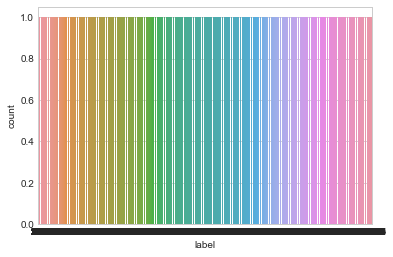

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train['label'] = train.index
sns.set_style('whitegrid')
sns.countplot(x='label',data = train)
plt.show()

We see we have the same number of samples per class. No issues with data augmentation and stuff.

In [8]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Abstract :
--
Thus we see that the data is presented in a flattened format. We have 42k train and 28k test images adding upto the 60k classic MNIST dataset. Let us preprocess the data first and treat it as flattened inputs first, and using scikit learn get a basic Decision Tree model going. Then we can rebuild the images and build a Deep Learning model using Keras and using Convnets try to get a better accuracy.

In [9]:
print("train size : ",len(train))
print("test size : ",len(test))

train size :  42000
test size :  28000


In [4]:
labels = train['label'].tolist()
print(labels[0:10])
len(labels)

[1, 0, 1, 4, 0, 0, 7, 3, 5, 3]


42000

In [5]:
train.drop(['label'],axis=1,inplace=True)
X = train.as_matrix(columns=None)
X.shape

(42000, 784)

Lets run a basic SVM classifier on the data using sklearn and see the results.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.20, random_state=42)

In [7]:
X_train.shape

(33600, 784)

In [8]:
X_test.shape

(8400, 784)

Let us train and test asap!

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
accscore = accuracy_score(y_test,prediction)
print(accscore)

0.8520238095238095


Thus we see, we can get a pretty cool accuracy of 85% with just a basic DecisionTree Classifier. Let's try to increase this using Deep Learning!

Let us first reconstruct each image into 28x28 images and attempt to view some of them. After that we can easily make a small Convolutional Neural Network and classify each image.

In [9]:
X.shape

(42000, 784)

In [10]:
X=X.reshape((42000,28,28))
X.shape

(42000, 28, 28)

Let's see a random image :

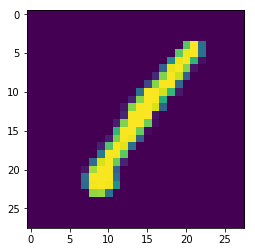

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
image = X[0]
imgplot = plt.imshow(image)

In [19]:
from keras.utils import np_utils
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [20]:
nb_classes=10
y = np_utils.to_categorical(labels, nb_classes).astype(np.float32)
class_totals = y.sum(axis=0)
class_weight = class_totals.max() / class_totals
y.shape

(42000, 10)

In [30]:
X=X.reshape(42000,28,28,1)
X.shape

(42000, 28, 28, 1)

In [37]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = X.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
__________

In [38]:
validation_split = 0.10
model.fit(X, y, batch_size=1000, class_weight=class_weight, epochs=20, verbose=1, validation_split=validation_split)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 10s 267us/step - loss: 2.0761 - acc: 0.3591 - val_loss: 0.3573 - val_acc: 0.9005
Epoch 2/20
37800/37800 [==============================] - 9s 236us/step - loss: 0.4684 - acc: 0.8527 - val_loss: 0.1106 - val_acc: 0.9648
Epoch 3/20
37800/37800 [==============================] - 8s 224us/step - loss: 0.2308 - acc: 0.9308 - val_loss: 0.0986 - val_acc: 0.9702
Epoch 4/20
37800/37800 [==============================] - 8s 224us/step - loss: 0.1562 - acc: 0.9551 - val_loss: 0.0784 - val_acc: 0.9748
Epoch 5/20
37800/37800 [==============================] - 9s 239us/step - loss: 0.1200 - acc: 0.9652 - val_loss: 0.0486 - val_acc: 0.9838
Epoch 6/20
37800/37800 [==============================] - 9s 240us/step - loss: 0.0905 - acc: 0.9734 - val_loss: 0.0425 - val_acc: 0.9845
Epoch 7/20
37800/37800 [==============================] - 9s 237us/step - loss: 0.0815 - acc: 0.9766 - val_loss: 0.0353 - 

In [39]:
open('model.json', 'w').write(model.to_json())
model.save_weights('weights.h5')
print("Model Saved")

Model Saved


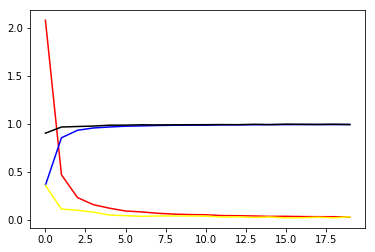

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(model.model.history.history['loss'],'red')
plt.plot(model.model.history.history['acc'],'blue')
plt.plot(model.model.history.history['val_loss'],'yellow')
plt.plot(model.model.history.history['val_acc'],'black')
plt.show()

We can see that the model really performs well on the training and validation sets. For real performance let's preprocess and check the test set.

In [41]:
Y = test.as_matrix(columns=None)
Y.shape

(28000, 784)

In [45]:
Y=Y.reshape(28000,28,28,1)
Y.shape

(28000, 28, 28, 1)

In [46]:
predict = model.predict(Y)

In [49]:
predict.shape

(28000, 10)

In [50]:
results = np.argmax(predict,axis = 1)

In [51]:
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

Let us see some images to see how the model is doing on them.

In [ ]:
Y=Y.reshape(28000,28,28)

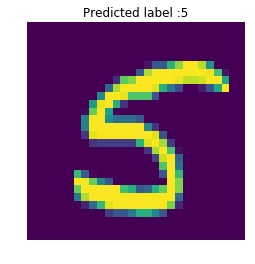

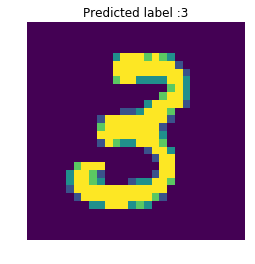

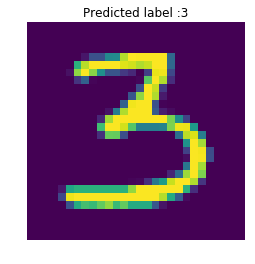

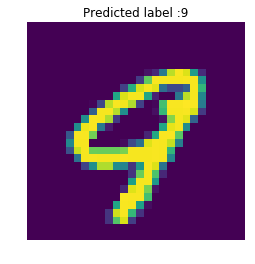

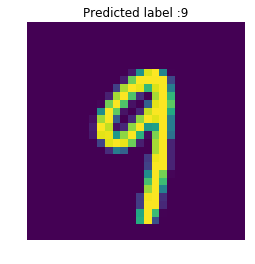

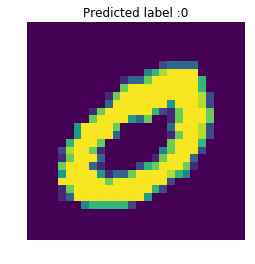

In [77]:
import random
num_ims = 6
for i in range(num_ims):
    ids  = random.randint(0,28000)
    prob = results[ids]
    image = Y[ids]
    plt.imshow(image)
    plt.title("Predicted label :"+str(prob))
    plt.axis('off')
    plt.show()

We see that the model does a pretty good job. Now let's save our files as csv to submit on Kaggle.

In [80]:
import csv
returns_path = "TEST_RESULT.csv"
file = open(returns_path,'w')
writer = csv.writer(file)
writer.writerow(["ImageId","Label"],)
for i in range(len(results)):
    RecordNo = i+1
    Label = results[i]
    writer.writerow([RecordNo,Label])
print("Done")    

Done


In [81]:
len(results)

28000

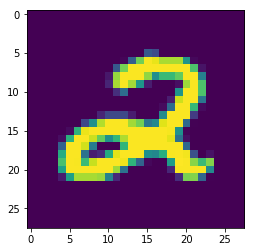

In [83]:
 plt.imshow(Y[len(Y)-1])

The entry got 98.9% accuracy on the testset. This can be further increased if we keep improving our model.
--

![](images/leaderboard.jpg?raw=true)

                                    Thanking You For Going Through the Document. 